In [66]:
#Forcasting energy data
!pip install -r C:\Users\Rahul\Downloads\requirements.txt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install statsmodels
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 22})

  Using cached cmdstanpy-0.9.68-py3-none-any.whl (49 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [67]:
cons =pd.read_csv('C:/Users/Rahul/Downloads/LoadData.csv', header=None, prefix='House')

In [68]:
number_days= 350
sampling_frequency =96

In [69]:
electricity= np.sum(cons[:], 1)            #format
print(electricity)

0         72.29
1         74.09
2         65.76
3         61.70
4         59.35
          ...  
33595    112.37
33596    115.12
33597    106.23
33598    101.10
33599     93.80
Length: 33600, dtype: float64


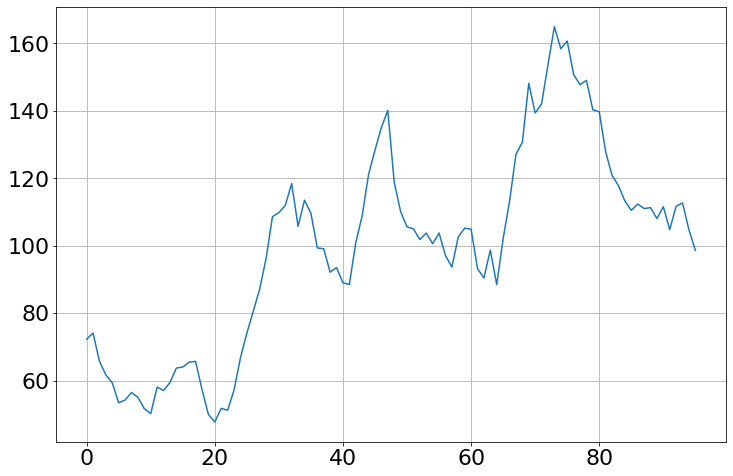

In [70]:
plt.plot(electricity[0:96], alpha=1)
plt.grid(True)
plt.show()

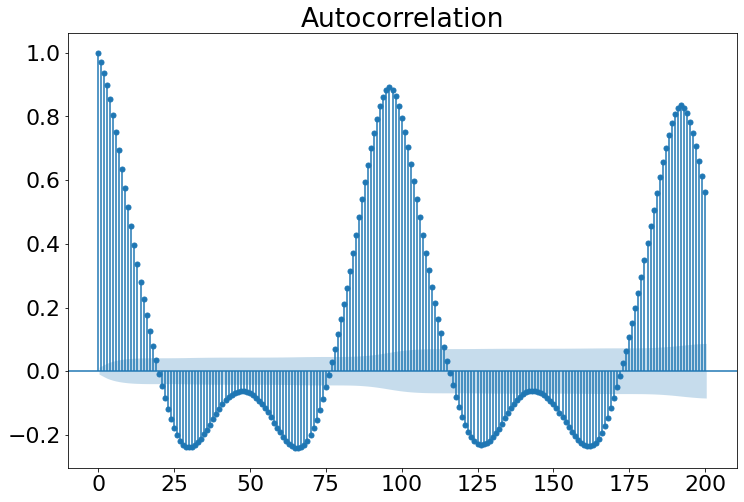

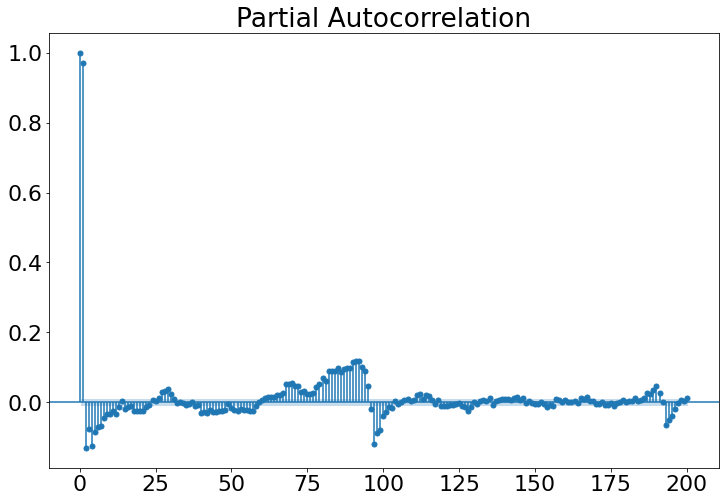

In [71]:
sm.graphics.tsa.plot_acf(electricity, lags=200)
plt.show()
sm.graphics.tsa.plot_pacf(electricity, lags=200)
plt.show()

In [72]:
prediction_persistance = np.array(electricity[0:96])
actual_demand = np.array(electricity[96:192])

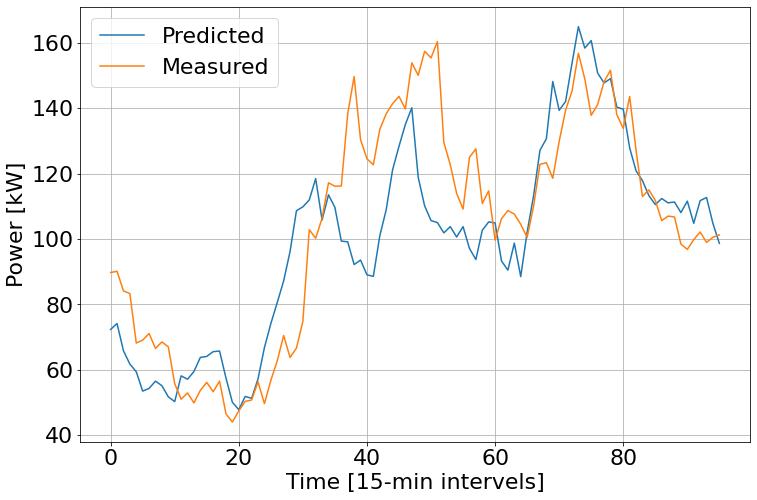

In [73]:
plt.plot(prediction_persistance, label='Predicted')
plt.plot(actual_demand, label='Measured')
plt.xlabel('Time [15-min intervels]')
plt.ylabel('Power [kW]')
plt.legend()
plt.grid(True)
plt.show()

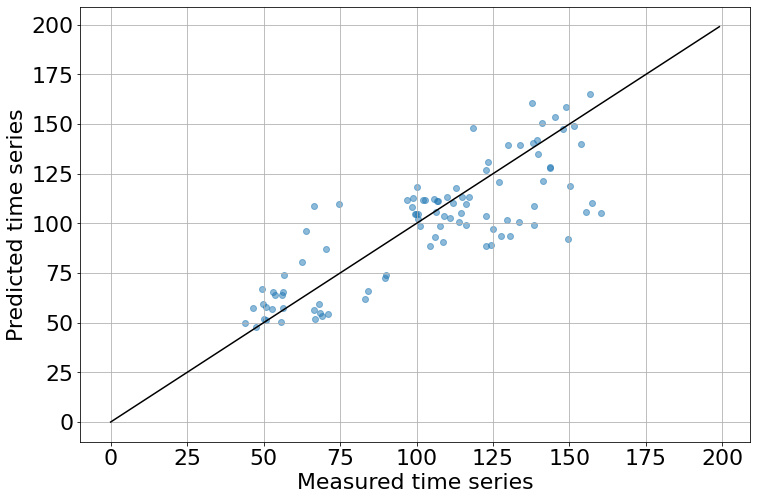

In [74]:
plt.scatter(actual_demand, prediction_persistance, alpha=0.5)
plt.plot(range(200), range(200), 'black')
plt.grid(True)
plt.xlabel('Measured time series')
plt.ylabel('Predicted time series')
plt.show()

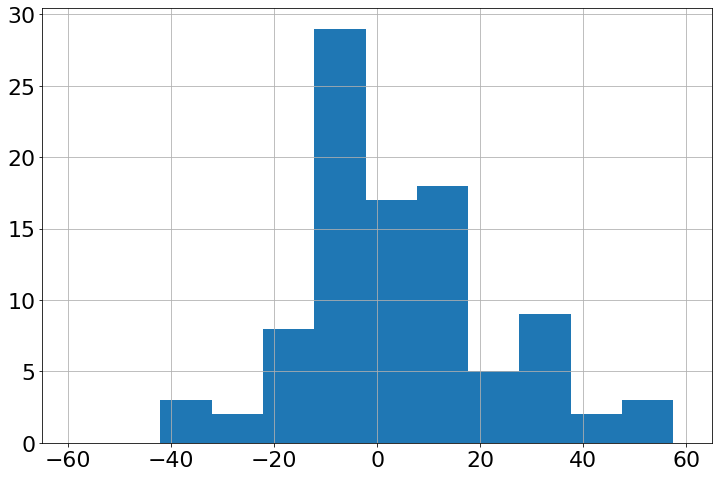

In [75]:
error = actual_demand - prediction_persistance
plt.hist(error)
plt.grid(True)
plt.xlim(-65, 65)
plt.show()

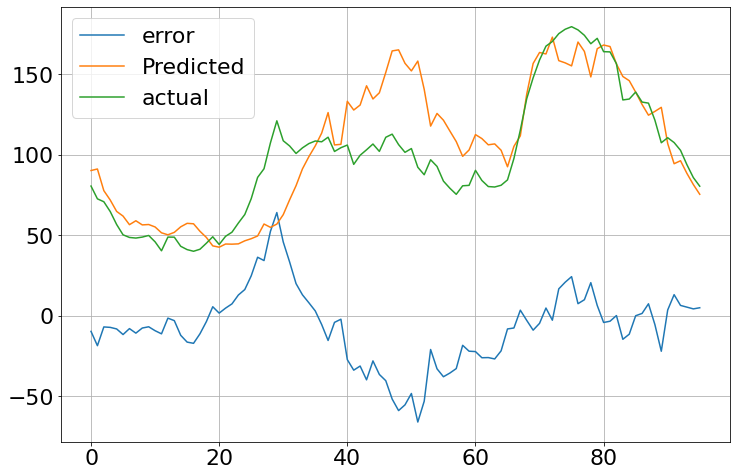

(349, 96)

In [76]:
prediction_persistance_2=[]
actual_demand_2 =[]
error_2 =[]
for i in range(349):
    prediction_persistance_1 = np.array(electricity[96*i: 96*(i+1)])
    #print(len(prediction_persistance_1))
    actual_demand_1 = np.array(electricity[96*(i+1): 96*(i+2)])
    #print(len(actual_demand_1))
    prediction_persistance_2.append(prediction_persistance_1)
    actual_demand_2.append(actual_demand_1)
    error_2.append(actual_demand_1 - prediction_persistance_1)
plt.plot(error_2[2], label='error')
plt.plot(prediction_persistance_2[2], label='Predicted')
plt.plot(actual_demand_2[2], label='actual')
plt.legend()
plt.grid(True)
plt.show()
np.shape(error_2)
    

In [77]:
unpack1 = np.array([elem for singleList in prediction_persistance_2 for elem in singleList])
unpack2 = np.array([elem for singleList in actual_demand_2 for elem in singleList])


[ 72.29  74.09  65.76 ... 135.79 121.03 111.09]
[ 89.71  90.08  84.07 ... 106.23 101.1   93.8 ]


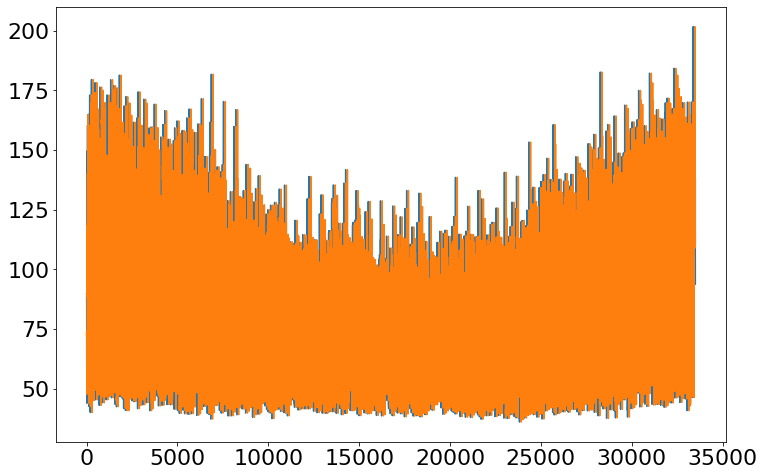

In [78]:
print(unpack1)
print(unpack2)
plt.plot(unpack2)
plt.plot(unpack1)

[ 17  15  18 ... -29 -19 -17]


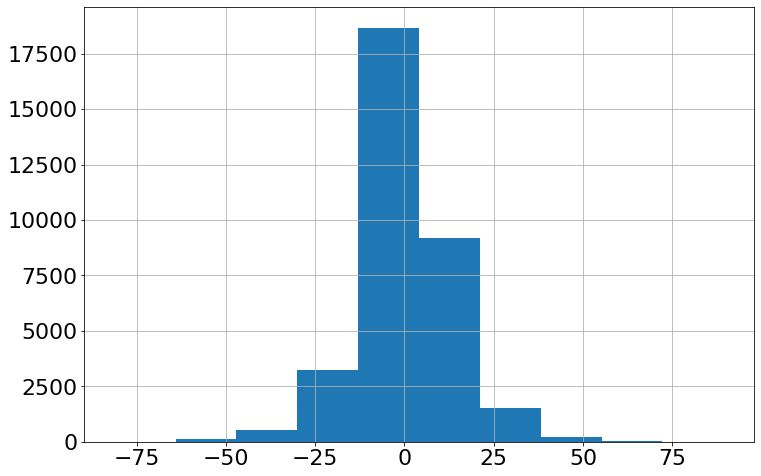

In [79]:
ERROR = unpack2 - unpack1
int_error = ERROR.astype(int)
print(int_error)
plt.hist(ERROR)
plt.grid(True)
plt.show()

In [80]:
def plot_ACF(ACF):
    plt.plot(range(-int(len(ACF)/2), int(len(ACF)/2)+1), ACF)
    plt.xlabel('Autocorrelation lags')
    plt.ylabel('ACF')
    plt.grid(True)
    plt.show()
             

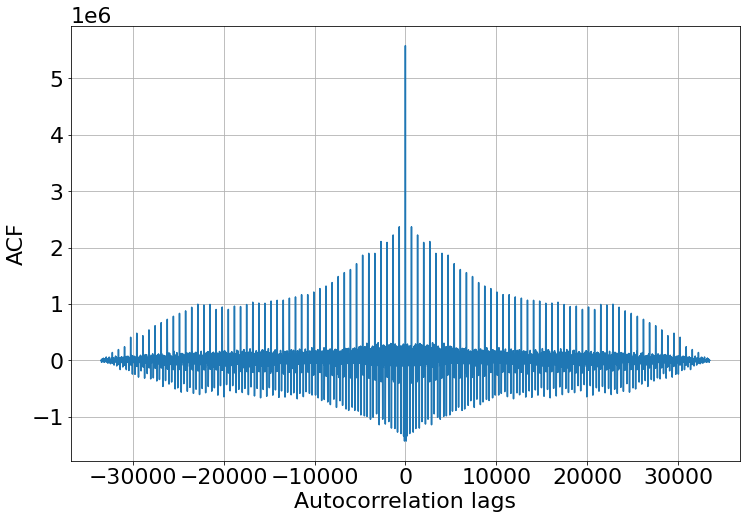

In [81]:
plot_ACF(np.correlate(ERROR, ERROR, mode='full'))

# there is no seasonality in the ERROR function

In [82]:
np.corrcoef(unpack2, unpack1)

array([[1.        , 0.89542701],
       [0.89542701, 1.        ]])

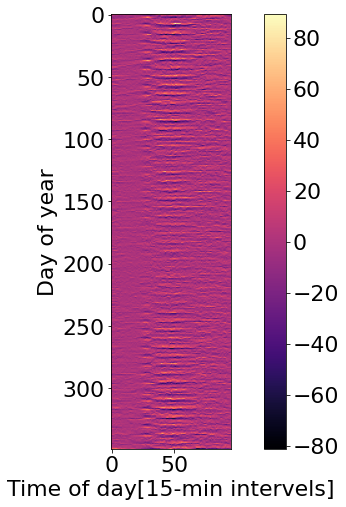

In [83]:
error2D = np.reshape(ERROR, (349, 96))
plt.imshow(error2D, cmap='magma')
plt.colorbar()
plt.xlabel('Time of day[15-min intervels]')
plt.ylabel('Day of year')
plt.show()

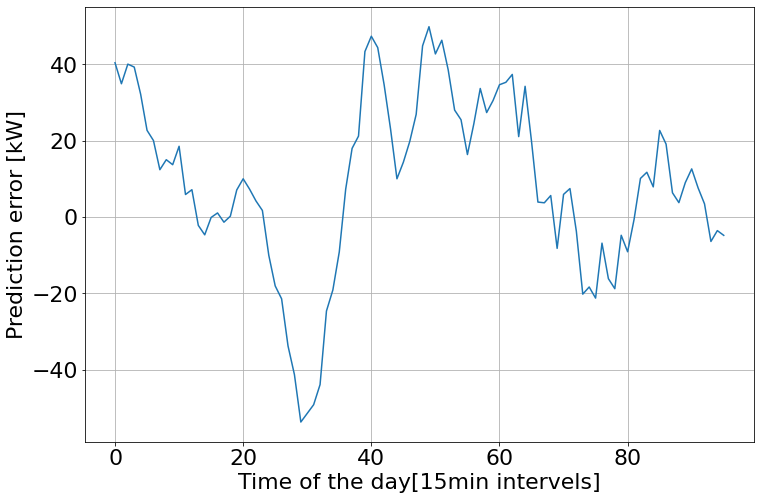

In [84]:
plt.plot(np.sum(error2D, 0))
plt.xlabel('Time of the day[15min intervels]')
plt.ylabel('Prediction error [kW]')
plt.grid(True)
plt.show()

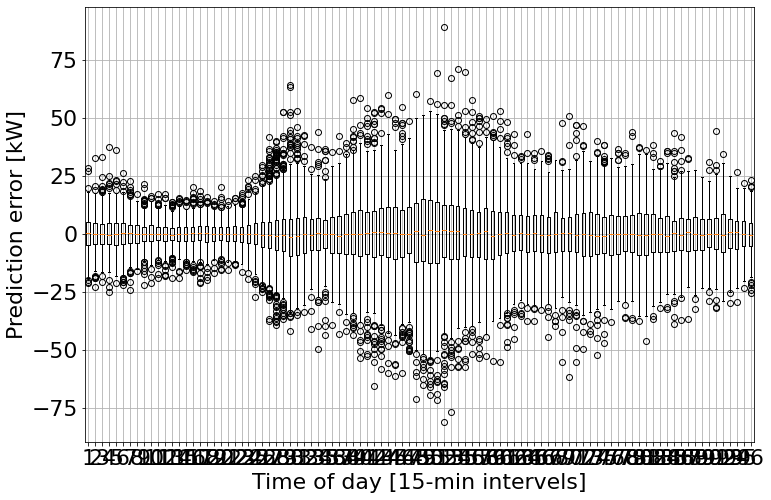

In [85]:
import pylab as plb
plt.boxplot(error2D)
plt.xlabel('Time of day [15-min intervels]')
plt.ylabel('Prediction error [kW]')
plt.grid(True)
plt.show()


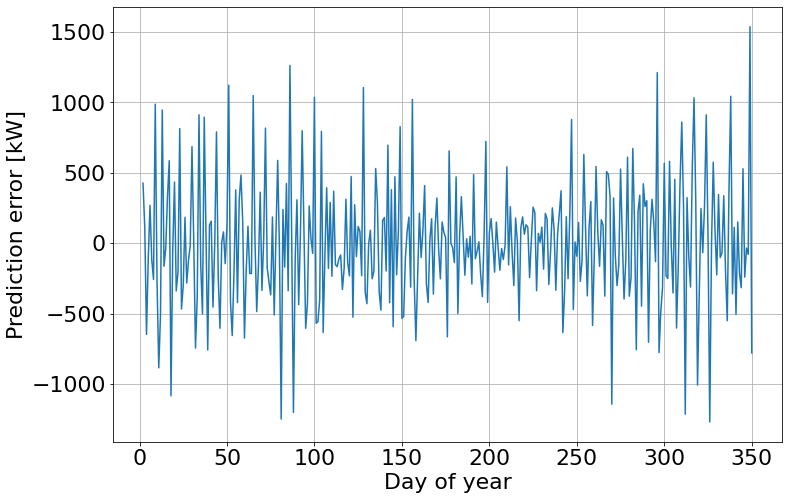

In [86]:
plt.plot(np.arange(2, 351), np.sum(error2D, 1))
plt.xlabel('Day of year')
plt.ylabel('Prediction error [kW]')
plt.grid(True)
plt.show()

In [87]:
#machine learning 

def extract_features(load, currentIndex, featureCounter):
    xVar[featureCounter, :] = load[currentIndex - 96*7 : currentIndex]
    yVar[featureCounter] = load[currentIndex]
    return xVar, yVar

In [88]:
from sklearn import linear_model
lin_model = linear_model.LinearRegression()

In [89]:
xVar = np.zeros((number_days * sampling_frequency, 7 * 96))
yVar = np.zeros(number_days * sampling_frequency)

In [90]:
feature_counter = 0
for i in range(7* sampling_frequency, 28* sampling_frequency):
    xVar, yVar = extract_features(electricity, i, feature_counter)
    feature_counter = feature_counter + 1

print(feature_counter)
    

2016


In [91]:
lin_model.fit(xVar[0:feature_counter, :], yVar[0: feature_counter])


LinearRegression()

In [106]:
#alternative to machine learning model
!pip install fbprophet
from fbprophet import Prophet
index = pd.date_range(start='2021-01-01', periods = 4*24*350, freq ='15T')
df = pd.DataFrame({'ds': index, 'y': electricity})
m = Prophet()


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Rahul\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Rahul\\AppData\\Local\\Temp\\pip-install-qrkbi59j\\fbprophet\\setup.py'"'"'; __file__='"'"'C:\\Users\\Rahul\\AppData\\Local\\Temp\\pip-install-qrkbi59j\\fbprophet\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Rahul\AppData\Local\Temp\pip-wheel-zg70woga'
       cwd: C:\Users\Rahul\AppData\Local\Temp\pip-install-qrkbi59j\fbprophet\
  Complete output (11 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  Importing plotly failed. Interactive plots will not work.
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f5236004a3fd5b8429270d00efc

ModuleNotFoundError: No module named 'fbprophet'